In [62]:
!conda install -c conda-forge keras --yes


NoSpaceLeftError: No space left on devices.



In [1]:
!conda update -n base -c defaults conda
!conda install -c conda-forge tensorflow --yes


Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.13.0             |   py37hecd8cb5_0         176 KB
    astor-0.8.1                |   py37hecd8cb5_0          47 KB
    backports.functools_lru_cache-1.6.4|     pyhd3eb1b0_0           9 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    c-ares-1.17.1              |       h9ed2024_0          92 KB
    conda-4.10.3               |   py37hecd8cb5_0         2.9 MB
    conda-package-handling-1.7.3|   py37h9ed2024_1         1.5 MB
    gast-0.5.0                 |     pyhd3eb1b0_0          13 KB
    google-pasta-0.2.0         |             py_0          46 KB
    importlib-metadata-3.10.0  |   py37hecd8cb5_0          33 KB
    keras-applications-1.0.8   |             py_1          29 KB
    ke

In [2]:

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

17465344/17464789 [==============================] - 2s 0us/step


In [2]:
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [3]:
!pip install pandas

import pandas as pd
df=pd.read_csv("/Users/philipsmith/Documents/highlycorrelateddescriptors_vp.csv",sep=",")
df
#header = next(training_file)
#delimiter = ","
#skip_header = True

,Psi_i_t,MPC06,SpMaxA_X,VE1_B(m),SpMax6_Bh(s),SpMaxA_AEA(ri),SM11_AEA(bo),Eig03_EA,Eig03_EA(ri),Eig04_AEA(ed),Eig04_AEA(bo),Eig04_AEA(dm),Eig03_AEA(ri),Eig04_AEA(ri),VaporPressure
0,0.054,0.000,0.143,2.464,2.318,0.547,0.274,0.274,0.232,1.294,0.405,-0.366,1.134,0.344,0.931659
1,0.071,0.000,0.167,2.327,2.073,0.540,0.000,0.000,0.000,0.382,0.000,-0.659,0.867,-0.105,0.918682
2,0.115,0.000,0.200,2.156,0.999,0.636,-0.618,-0.618,-0.541,0.000,-0.618,-1.328,0.257,-0.697,0.990197
3,0.050,0.000,0.143,2.499,2.027,0.561,-0.414,-0.414,-0.388,1.000,0.000,-0.596,0.543,-0.099,0.860331
4,0.001,2.996,0.077,3.326,3.889,0.314,1.646,1.646,1.625,3.759,2.862,1.610,2.634,2.414,0.018548
5,0.128,0.000,0.250,1.933,0.999,0.781,-1.414,-1.414,-1.304,0.000,0.000,0.000,-0.492,0.000,0.860237
6,0.008,2.197,0.100,2.992,3.244,0.389,1.414,1.414,1.397,3.466,2.607,1.319,2.403,2.000,0.126692
7,0.002,3.332,0.071,3.214,3.930,0.293,2.125,2.125,1.931,3.759,2.426,2.286,3.056,1.904,0.008832
8,0.035,0.000,0.167,2.225,1.115,0.698,-1.000,-1.000,-0.593,1.000,0.000,-0.226,0.000,-0.277,0.897022
9,0.007,2.197,0.100,2.950,3.296,0.391,1.414,1.414,1.376,3.466,2.532,1.311,2.392,2.005,0.026860


In [4]:
x_columns=df.columns
x = df[x_columns].values
y = df['VaporPressure'].values

In [5]:
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
oos_y = []
oos_pred = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]  
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(35, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,
              epochs=100)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_absolute_error(pred,y_test))
    print(f"Fold score (MAE): {score}")
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)

score = np.sqrt(metrics.mean_absolute_error(oos_pred,oos_y))
print(f"Final out of sample (oos) score (RMSE): {score}")    
    


Fold #1
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 33 samples, validate on 9 samples
Epoch 1/100
33/33 - 0s - loss: 0.9717 - val_loss: 0.6476
Epoch 2/100
33/33 - 0s - loss: 0.8415 - val_loss: 0.6106
Epoch 3/100
33/33 - 0s - loss: 0.9022 - val_loss: 0.4594
Epoch 4/100
33/33 - 0s - loss: 0.6438 - val_loss: 0.3496
Epoch 5/100
33/33 - 0s - loss: 0.7464 - val_loss: 0.3079
Epoch 6/100
33/33 - 0s - loss: 0.7893 - val_loss: 0.3004
Epoch 7/100
33/33 - 0s - loss: 0.5462 - val_loss: 0.3281
Epoch 8/100
33/33 - 0s - loss: 0.7005 - val_loss: 0.3771
Epoch 9/100
33/33 - 0s - loss: 0.6152 - val_loss: 0.3858
Epoch 10/100
33/33 - 0s - loss: 0.5871 - val_loss: 0.3636
Epoch 11/100
33/33 - 0s - loss: 0.4861 - val_loss: 0.3328
Epoch 12/100
33/33 - 0s - loss: 0.6860 - val_loss: 0.2816
Epoch 13/100
33/33 - 0s - loss: 0.5652 - val_loss: 0.2498
Epoch 14/100
33/33 - 0s - loss: 0.6019 - val_loss: 0.2408
Epoch 15/100
33/33 - 0s - lo

In [30]:

!pip install matplotlib
import matplotlib.pyplot as plt
df_1=pd.read_csv("/Users/philipsmith/Documents/validation.csv",sep=",")

df_1_2=df_1['VP'].values

print(df_1_2)
print(oos_pred)
print(oos_y)

[0.859467 0.121883 0.003374 0.781081 0.049411 0.018807 0.006284 0.011044
 0.08039  0.145164 0.015475]
[[ 0.07531247]
 [ 0.6240422 ]
 [ 0.45373878]
 [ 0.6589144 ]
 [ 0.05861497]
 [ 0.09865056]
 [ 0.2869479 ]
 [ 0.16490218]
 [ 0.06701019]
 [ 0.10189034]
 [ 0.043685  ]
 [ 0.03821816]
 [ 0.06938758]
 [ 0.13491735]
 [ 0.07145759]
 [ 0.16163549]
 [ 0.12252794]
 [ 0.23923656]
 [ 0.9135694 ]
 [ 0.8973521 ]
 [ 0.81651866]
 [-0.01333419]
 [ 0.27541718]
 [ 0.03737716]
 [ 0.7657176 ]
 [ 0.00180522]
 [ 0.90138185]
 [ 0.7507064 ]
 [ 0.04380814]
 [ 0.06479006]
 [ 0.05796118]
 [ 0.00508351]
 [ 0.09632078]
 [ 0.00423269]
 [-0.02407946]
 [-0.01845404]
 [ 0.03762025]
 [ 0.6714478 ]
 [-0.01530963]
 [ 0.4217983 ]
 [ 0.00517353]
 [-0.01638996]]
[1.31440e-02 8.96455e-01 7.81081e-01 1.00000e+00 6.28400e-03 3.89900e-02
 4.37870e-01 1.08834e-01 9.71000e-04 1.21883e-01 2.15010e-02 0.00000e+00
 4.94110e-02 1.44573e-01 6.60270e-02 1.88253e-01 1.45164e-01 2.86448e-01
 9.31283e-01 9.18234e-01 8.59467e-01 1.17950e-02

Training Set R-Square= 0.47690472403759643


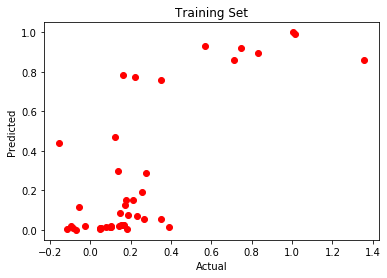

In [6]:
plt.plot(oos_pred, #training Y value
 oos_y, #predicted Y value
 'ro') #red dots
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
#Compute R-Square value for training set
testR2=r2_score(oos_pred, oos_y)
print("Training Set R-Square=", testR2)

In [46]:
oos_pred_2=y[0:11]
oos_pred_3=np.asarray(oos_pred_2)
print(oos_pred_3)
print(df_1_2)


[0.931283 0.918234 0.990143 0.859561 0.013144 0.859467 0.121883 0.003374
 0.896455 0.021501 0.00864 ]
[0.859467 0.121883 0.003374 0.781081 0.049411 0.018807 0.006284 0.011044
 0.08039  0.145164 0.015475]


Validation Set R-Square= -0.43051958335039475


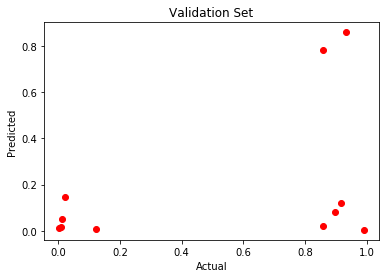

In [52]:
plt.plot(oos_pred_2, #training Y value
 df_1_2, #predicted Y value
 'ro') #red dots
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
#Compute R-Square value for training set
testR2=r2_score(oos_pred_2,df_1_2)
print("Validation Set R-Square=", testR2)